.[머신러닝 학습단계(7단계)].
1. 문제를 정의하는 단계 : 어떤 문제를 어떻게 해결할 것인지 정의
2. 데이터 수집 : 1단계에서 정의된 문제를 해결하기 위해 데이터를 수집하는 단계
    - 변수 = pd.DataFrame('가지고 온 데이터')
3. 데이터 전처리 : 결측치와 이상치를 수정하는단계, 결측치, 이상치를 확인하고 수정
    - 변수.info() : 결측치 확인
    - 변수.describe() : 이상치 확인(수치형만 확인)
 4. 탐색적 데이터 분석(EDA) : 시간이 충분치 않을 때는 많이 생략되는 과정, 데이터를 그래프로 시각화, 기술통계값으로 데이터를 살펴보는 과정
5. 모델 선택 및 하이퍼파라미터 튜닝 : 
    - 사용할 모델을 불러와서 파라미터를 수정 
      트리모델 = DecisionTreeClassifier(max_depth =n)
    - 데이터 분리(문제/정답-인덱서, 훈련/평가-train_test_split())
       X : 문제(데이터프레임 형태), y : 정답(시리즈 형태)
       X_train, X-test, y_train, y_test = train_test_split(X,y, test_size=0.3)
6. 학습 : 모델이 규칙을 찾기위한 과정, 훈련데이터(train data)로 학습
    - 트리모델.fit(X_train, y_train)
7. 평가 : 모델 자체 평가, 훈련/평가용 데이터의 점수를 확인 => 과대적합/과소적합 여부 확인
    - 교차 검증 X : 트리모델.score(X-train, y-train)
                    트리모델.score(X_test, y_test)
    - 교차 검증 O : cross_val_score(트리모델, X-train, y-train, cv=5).mean()
                    cross_val_score(트리모델, X_test, y_test).mean()
    - 교차검증 : 모델이 훈련데이터에 얼마나 민감한지 파악하는 용도
                ==> 나타내는 결과값의 대역폭(변하는값)이 넓다면 민감하다.
                ==> 모델이 안정적이지 않다.
                나타내는 값이 균등하다면 데이터에 대해 민감하지 않다 -> 모델이 안정적이다.
   모델이 예측하는 값 확인 
   - 트리모델.predict([[이차원 형태의 새로운 데이터]]

### 문제 정의
- 타이타닉 데이터를 활용하여 생존과 사망을 구분하는 머신러닝 모델을 만들자
- kaggle 경진대회에서 높은 순위를 차지해보자.

### 데이터 수집
 - kaggle 사이트에서 데이터 다운로드

In [1]:
# train과 test 데이터 가져오기
# train 변수 : train.csv 파일
# test 변수 : test.csv 파일
import pandas as pd 
train = pd.read_csv('./Data/titanic/train.csv')
test = pd.read_csv('./Data/titanic/test.csv')
print(train.shape)
print(test.shape)
# train과 test의 특성(컬럼)의 차이는 Survived 컬럼의 차이
# 머신러닝 학습을 통해서 찾은 규칙을 기반으로 예측해야 하는 컬럼.


(891, 12)
(418, 11)


#### 컬럼들의 특징
![특징]("/titanic/info.png")

### 데이터 전처리


#### 이상치 확인

In [2]:
train.info()
# 결측치 컬럼 : Age, Cabin, Embarked
# 머신러닝 학습을 위해 숫자형 자료로 변경 컬럼 : Name, Sex,Ticket,Cabin,Embarked => encording이 필요 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test.info()
# 결측치 컬럼 : Age, fair, Cabin : RangeIndex: 418 개가 아닌 값들
# 머신러닝 학습을 위해 숫자형 자료로 변경 컬럼 :Name
# Name, sex, Ticket, cabin, Embarked => encoding 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 이상치 확인
 - describe()

In [4]:
train.describe()
# passengerld : 승객의 번호를 의미, 필요없는 데이터 -> 삭제
# Survived(0,1) -> 38%가 생존
# Pclass : 객실의 등급(1,2,3)으로 평규읜 의미 (std)가 없음
# Age : 평균값이 의미가 있음. 20~30대 승객이 많음.
# SibSp : 형제 자매/ 배우자 수 --> 이상치 의미가 없음
# Parch : 부모/자식 수  --> 이상치 의미가 없음
# fare : 평균은 어느정도 의미가 있음.
#  평균과 중앙값을 비교했을 때 중앙값에 비해 평균이 높다는 의미는?
#  1.데이터 수집이 잘못
#  2.티켓의 가격이 잘못
#  3.진짜로 1등급을 넘어서는 가격이 존재 

# Fare 컬럼을 제외하고는 특별한 이상치가 있다고 볼 수 없음.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Embarked 결측치 채우기
- 탑승항구 : S, C, Q 정보
- 결측치 수가 상대적으로 작기때문에(2) 먼저 처리

In [5]:
# 해당 컬럼의 데이터 갯수를 세어주는 함수 : value_counts()
train['Embarked'].value_counts()

# 결측치를 채울 때 주의할 점
# - 어떤 기준으로 값을 채울 것인가 확인이 중요
# 탑승하는 항구의 값을 채우기 위해 다른 컬럼이나 추가적인 정보를 확인  필요. 
# 탑승하는 항구별로 티켓의 가격이 다른지 확인하는 것도 의미가 있을 수 있음 .

# 결측치가 2개이므로 전체적인 흐름에 영향을 주지 않을 것 같아서 ==> 대표값으로 측정

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### train데이터 - 결측치 채우기

In [6]:
# 결측치 2개(891-> 889)를 최빈값(S) ==> 대표값으로 채우기 
#  전체 결측치를 한번에 채워주는 함수 : fillna(입력값)

train['Embarked'].fillna('S', inplace=True) #inplace = True : 변경된 값을 저장

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### test데이터 -Fare 결측치 채우기 

In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
#test['Fare'].value_counts()
# Embarked 컬럼처럼 그 컬럼의 최빈값으로 채우는 게 의미가 없음
# 연속적인 숫자값으로 가장 최빈값이 7.75 ==> 평균도 아니고 중앙값에도 미치지 못하는 값

# Fare 컬럼의 중앙값으로 사용하여 결측치를 채워보자
test['Fare'].fillna(14.454200,inplace=True) # 중앙값으로 변경허고 저장

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Age 결측치 채우기
#### - 다른른 컴럼들과의 상관관계를 사용해서 결측치를 채우기

In [11]:
# 수치형 컬럼들 간의 상관관계를 나타내는 함수 : corr()
# 그래프의 값이 마이너스에 가까울때는 반비례 관계. 1에 가까울 때는 비례 관계.
# 나이와 Pclass,sibSp,Parch는 반비례관계, Fard는 비례관계
# -1 ~ 1 사이의 숫자로 표현 
# -1에 가까울 수록 반비례 관계 : 나이가 많을 수록 객실등급은 1등급에 가까울 거다.
# 1에 가까울 수록 (정)비례 : 
train.corr()

# corr 함수가 오류가 날 경우 train.select_dtypes(include=['int64', 'float64']).corr()

# corr는 파이썬 버전에 따라 오류가 자주 생길 수 있는 함수
# corr() 사용시 흔히 발생하는 문제
# 1.누락된 값이 있는 경우 NaN 값의 행렬 반환
# 2. 숫자가 아닌 열 데이터 유형이 포함되어 있는 경우 : 이들을 무시하고 실행하기 떄문에 오류 발생
# 3. 내가 가져온 데이터 프레임에 불균형한 데이터가 포함되어 있을 경우
#     상관계쑤가 의미가 없어지는 경우 

# 해결방법
# 1.누락된 값은 삭제:corr()을 적용하기 전에 dropna()를 이용해서 누락된 값을 포함하고 있는 행을 삭제 ,
# 2.숫자가 아닌 열 삭제 : select_dtypes  corr()적용하기 전에 select_dtypes() 숫자열만 선택
#    select_dtypes(include=[], exclude=[]) - 열에 포함된 데이터들을 내가 명시한 dtypes를 기준으로 인덱싱.
#    - 데이터프레임 형태가 기본
#    - include에 넣은 값을 포함, exclude에 넣은 값은 제외한 열을 DataFrame 형태로 변환 
# 3. 데이터를 표준화 : scikit-learn 라이브랑 scatter를 사용해서 데이터를 표준화시켜주는 방법

# 수치 앞의 부호는 정비례. 반비례인지 판단 기준
# 부호뒤의 숫자의 절대값이 1에 가까울 수록 서로 영향을 준다고 판단
# 형제자매/배우자수, 객실등급이 나이와 상관이 있을 것이다.

C:\Users\gjaischool\AppData\Local\Temp\ipykernel_14152\2965203234.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [12]:
# Age 컬럼을 Pclass컬럼과 비교해서 결측치 채우기

train[['Pclass','Age']] # -> pclass 별로 묶어서 중앙값 확인

train[['Pclass', 'Age']].groupby(by='Pclass').median()
# Pclass 별로 탑승한 승객의 나이의 중앙값

#Pclass = 1,2,3 : 숫자자료이지만 등급을 나타내는 범주형 자료 

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [13]:
# Age 컬럼을 Pclass 먼저, Sex 컬럼 추가하기 
# Pclass 컬럼별로 탑승한 승객의 나이의 중앙값

# 3개의 컬럼을 보기 위해서 age_table로 저장 (테이블 형태로)
age_table= train[['Pclass','Sex','Age']].groupby(by=['Pclass','Sex']).median()
age_table

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [14]:
train.iloc[6]
# 행 1개 : 승객 1명의 정보

PassengerId                          7
Survived                             0
Pclass                               1
Name           McCarthy, Mr. Timothy J
Sex                               male
Age                               54.0
SibSp                                0
Parch                                0
Ticket                           17463
Fare                           51.8625
Cabin                              E46
Embarked                             S
Name: 6, dtype: object

In [15]:
# 1. 함수 정의 
# 하나의 행을 가져와서
# Age가 결측치가 아닌 경우 --> 원래 가지고 있던 값을 그대로 사용
# Age가 결측치라면 --> Pclass와 Sex 컬럼을 확인하고 해당하는 값을 age_table에서 검색해서 해당 값으로 채우기 
# 꺼내오는 하나의 행 정보 : 넘파이 배열형태 
import numpy as np

# 함수를 만들 때 주의할 점 
# 행단위로 데이터가 들어올 것으로 예상하고 만들기 
def fill_age(person) : 
    if np.isnan(person['Age']) : # 꺼내온 정보에서 Age 컬럼이 결측치 0 
        return age_table.loc[person['Pclass'], person['Sex']]['Age']
        # 결측치라면 age_table의 객실등급과 성별을 확인하고 age 값을 적음
    else : # Age 컬럼이 결측치가 아님
        return person['Age'] #가지고 있는 값 사용 

In [16]:
# 2. 사용자 승객의 정보를 확인하고 함수 적용 ==> apply()
# apply() : 행과 열단위의 복잡한 계산을 할 때 사용하는 함수 
age_table.loc[3, 'male']['Age']

25.0

In [17]:
age_table.loc[3, 'male']['Age']
train.apply(fill_age, axis = 1)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Length: 891, dtype: float64

In [18]:
train['Age'] = train.apply(fill_age , axis =1 )
test['Age'] = test.apply(fill_age, axis= 1)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Cabin 결측치 채우기

In [20]:
train['Cabin'].unique()

# 앞 - 알파벳 : 타이타닉 호의 구역
# 뒤 - 숫자 : 방번호
# 데이터의 종류가 너무 많아서 규칙으로 만들기 부적합 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
# 앞에있는 알파벳만을 사용해서 공통 특성으로 그룹화 문자열 인덱싱 사용 
train['Cabin']= train['Cabin'].str[0]
test['Cabin']= test['Cabin'].str[0]

In [22]:
train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [23]:
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [24]:
# 원래 cabin의 값은 규칙에 큰 의미가 없고 결측치가 많으므로 행자체를 삭제할 수 있으나 이번에는 실습이기때문에 넣고 실습함.
#Cabin : 결측치가 가장 많은 컬럼
 # 삭제하기 보다는 많은 결측치를 보존하는 방법을 사용

#결측치를 하나의 데이터로 생각
# 1. 사망자의 데이터
# 2. 데이터를 받지못해서 
# 3. NaN값을 제대로 활용해서 'n'이라는 값으로 채우기

train['Cabin'].fillna('N', inplace=True)
test['Cabin'].fillna('N', inplace= True)

In [25]:
train['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Passengerld 삭제
- 승객의 탑승번호는 생존여부와는 연관이 없으므로 필요없는 데이터

In [27]:
# 행이나 열단위로 데이터를 삭제 : drop()
# drop()은 별도로 확인하지 않고 바로 삭제되기 때문에 매우 조심해야함.
train.drop('PassengerId', axis= 1, inplace = True)
test.drop('PassengerId', axis= 1, inplace = True)

In [28]:
train.shape, test.shape

((891, 11), (418, 10))

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


### 탐색적 데이터 분석 (EDA 
 - 그래프를 그림으로 확인하는 단계


In [30]:
# 그래프를 쉽게 그려주느 라이브러리
# !pip install seaborn

In [31]:
import seaborn as sns

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


#### 범주형 데이터 
- object 타입 
- Name, Sex, Ticket, Embrked, Pclass
- Name, Ticket은 값이 몇개 있는지 확인해서 차트로 보는게 별 의미가 없음. 삭제
- bar 차트 사용

In [33]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


#### Cabin 시각화

<Axes: xlabel='Cabin', ylabel='count'>

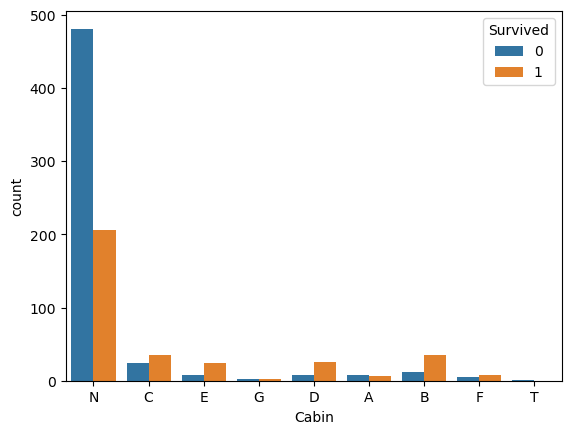

In [34]:
sns.countplot(data=train, x='Cabin', hue='Survived')

#  <Axes : xlabel='Cabin', ylabel = 'count'>를 삭제하고 싶다면
# matplotlib.pyplot을 불러와서
#plt.show()
# 그래프 상에서 많은 정보를 보여주는 bar차트
#값의 개수를 보여줌,
#하나의 x축에 2개의 값이 존재
# countplot : 값의 개수, y => 자동으로 카운트 
# x : 객실의 구역 - Cabin
# hue : x축에 명시된 컬럼에서 생존자/ 사망자 수 count, Survived(0따로 1따로 카운트)

 - Cabin의 결측치를 N이라는 값으로 채운게 어느정도 의미가 있었음.
 - 상대적으로 N에서 많은 사라들이 사망했음

#### Pclass 시각화

<Axes: xlabel='Pclass', ylabel='count'>

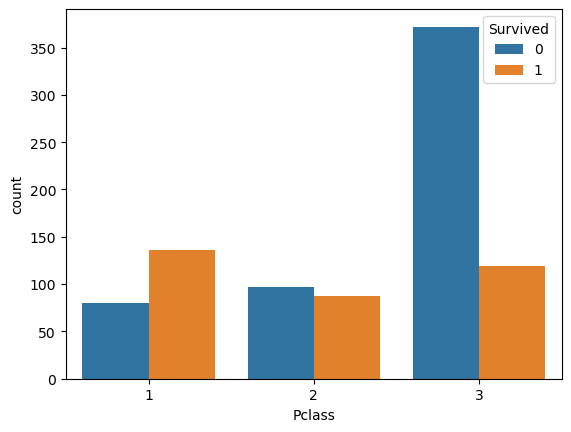

In [35]:
sns.countplot (data=train, x='Pclass',hue='Survived')

- 객실 등급이 높아질 수록 생존율이 올라감

#### 숫자형 데이터
- int, float64 타입
- 구간을 나눠서 데이터의 분포를 추정하는 자료 (연속적인 숫자)
- suvived, Age, SibSp, parch, Fare
- 히스토그램

#### Sex,Age, Survived 시각화

<Axes: xlabel='Sex', ylabel='Age'>

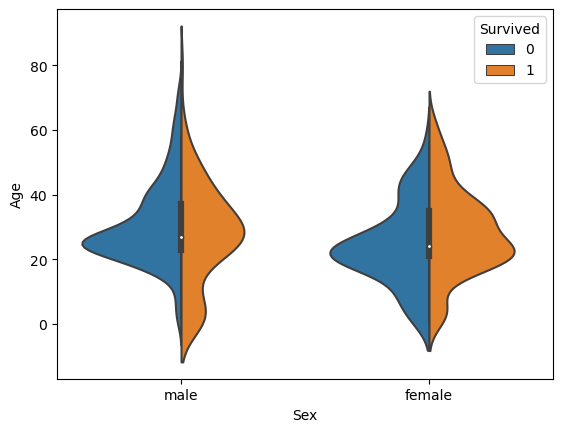

In [36]:
sns.violinplot(data=train, x='Sex', y='Age', hue='Survived', split=True)
# split =  True : 생존/사망을 한번에 보여줌
# 나이를 생존자와 사망자의 비율을 성별로 나타내준 히스토그램

- 20-40대 사이가 많이 사망했음.
- 어린아이 중에서는 남자아이가 여자아이에 비해 많이 생존했음.
- 고령층에서는 여성이 남성에 비해 상대적으로 많이 생존했음.

#### Fare,Sex,Survived 시각화

<Axes: xlabel='Sex', ylabel='Fare'>

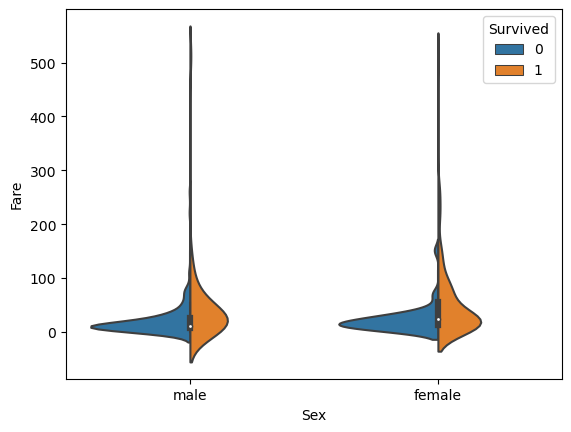

In [37]:
sns.violinplot(data=train, x='Sex', y='Fare', hue='Survived', split=True)

- 요금이 싼 사람이 상대적으로 많이 사망햇음
- violinplot에서 Fare처럼 연속적인 수치값으로 이루어진 데이터를 표현.
- 각 값의 개수를 세는 것 보다는 연속적인 부분을 확인하며 
- 정보를 얻는 방법. 수치형 데이터를 시각화 하는 방법

#### Cabin과 Pclasss 시각화

<Axes: xlabel='Cabin', ylabel='count'>

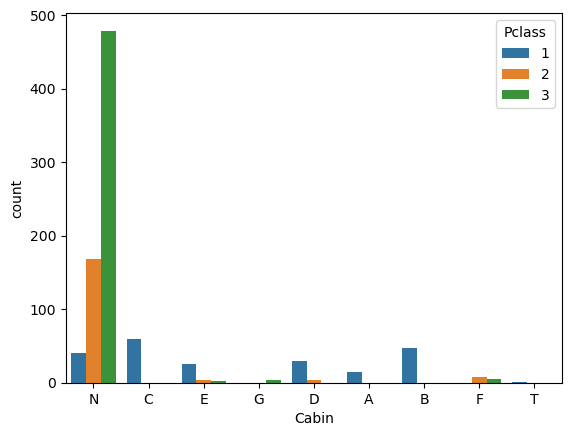

In [38]:
sns.countplot(data=train, x='Cabin', hue = 'Pclass') #x축 : 객실의 구역 y축 : 객실 등급 카운트

- N구역의 사람들은 3등 객실의 사람들이 많았기 때문에 사망률도 높았음.
- A,B,C,D,E 구역은 1등 객실의 사람들이 많았음 -> 생존율도 상대적으로 높았다.
- 가장 결측치가 많았던 N구역의 사람들이 가장 많았음.
- 그 중 3등급의 객실의 사람이 가장 많았음.

#### 성별로 생존/사망비율 확인

<Axes: xlabel='Sex', ylabel='count'>

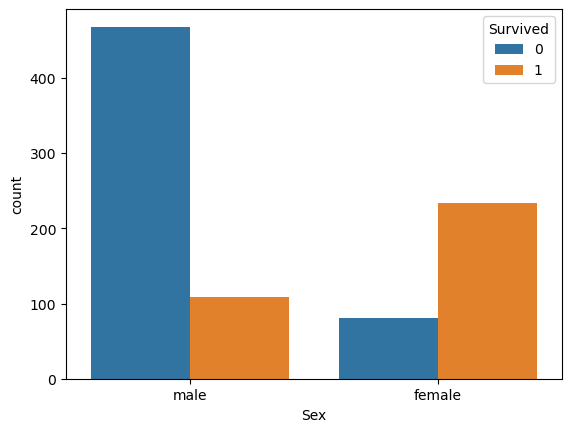

In [39]:
sns.countplot(data=train, x='Sex', hue = 'Survived')

- 남성은 사망비율이 높고, 여성은 생존비율이 높음

#### Embarked와 Pclass 시각화

<Axes: xlabel='Embarked', ylabel='count'>

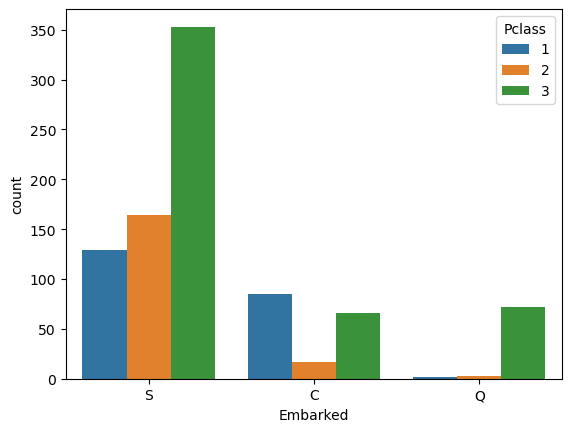

In [40]:
sns.countplot(data=train, x='Embarked', hue = 'Pclass')

- Q라는 도시는 3등 객실의 탑승객이 많은 것을 보면 S,C에 비해 좀 낙후된 도시가 아닐까? 라는 생각
- 각 항구에 따른 객실들의 연관성을 생각해볼 필요가 있음.
- countplot()은 숫자형 자료보다는 범주형 데이터에서 더 유용한 함수(자료의 유형별로 카운트해서 보기 쉽게 시각화해주기 때문)

#### 특성공학
- 가지고 있는 특성을 기반으로 새로운 특성을 만드는 것
- SibSp, Parch을 더해서 가족의 숫자라는 새로운 컬럼을 생성 ==> 가족의 수 특성 만들기

#### 가족의 수 특성 만들기
- SibSp(형제자매, 배우자 수) + Parch(부모. 자식의 수) + 1(본인) => Family_size(가족의 수)

In [41]:
# 가지고 있는 특성이라면 값이 수정, 없다면 새로운 특성이 생성
train['Family_size'] = train['SibSp']+train['Parch']+1
test['Family_size'] = train['SibSp']+train['Parch']+1

In [42]:
train.head() #추가된 특성 확인

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1


<Axes: xlabel='Family_size', ylabel='count'>

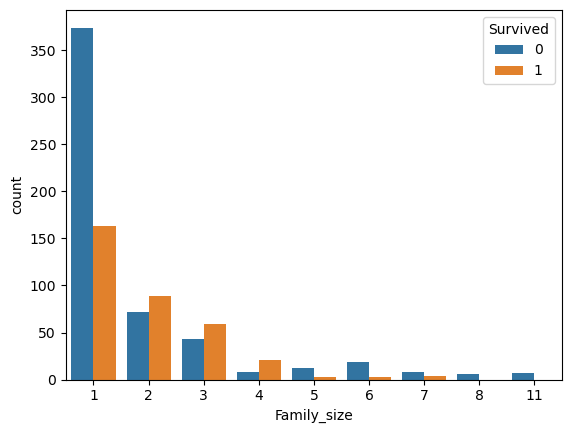

In [43]:
sns.countplot(data=train, x='Family_size', hue='Survived')

- 전체 데이터가 3개의 구간으로 나위어져 있음을 확인
- 가족의 수를 특징별로 묶어서 범주형으로 변환 예정
- 1 : 사망율이 높은 비율 - Alone
- 2 ~ 4 : 생존이 높은 비율 - Small
- 5 ~ 11 : 사망이 높은 비율 - Large
- 구간별로 구분된 수치형 데이터를 문자형 데이터(범주형으로 변경) -vining

In [44]:
#pd.cut() : 구간별로 데이터의 이름을 붙여주는 함수
#필요한 정보
#1.구간에 대한 정보 : bins
#2. 구간에 대한 범주(라벨) 이름 : labels

bins = [0,1,4,11] # 0초과 ~ 1이하 , 1초과 ~ 4이하, 4초과 ~ 11이하
labels = ['Alone', 'Small', 'Large']

In [45]:
train['Family_size'].head()

0    2
1    2
2    1
3    2
4    1
Name: Family_size, dtype: int64

In [46]:
pd.cut(train['Family_size'], bins=bins, labels=labels)

0      Small
1      Small
2      Alone
3      Small
4      Alone
       ...  
886    Alone
887    Alone
888    Small
889    Alone
890    Alone
Name: Family_size, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [47]:
# train['Family_size'] = pd.cut(train['Family_size'], bins=bins, labels= labels)
# test['Family_size'] = pd.cut(test['Family_size'], bins=bins, labels=labels)

In [48]:
train['Family_group'] = pd.cut(train['Family_size'], bins=bins, labels= labels)
test['Family_group'] = pd.cut(test['Family_size'], bins=bins, labels= labels)

In [49]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2,Small
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Small
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Small
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1,Alone


#### Family_group 그룹화

<Axes: xlabel='Family_group', ylabel='count'>

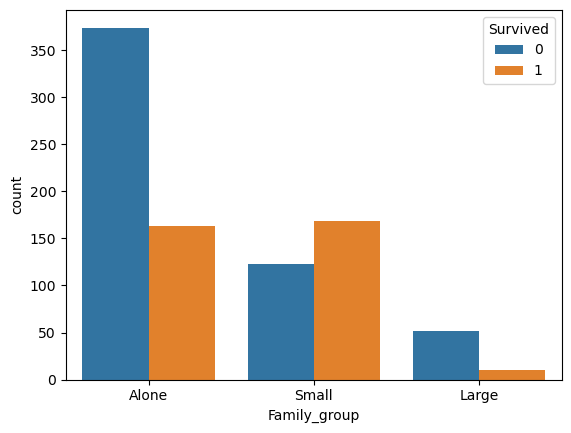

In [50]:
sns.countplot(data=train, x='Family_group', hue='Survived')

In [51]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,2,Small
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Small
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Small
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,1,Alone


#### Text 데이터 
- Name. Ticket 
- Text 데이터 ====> 비정형 데이터 (틀도 없도 연산도 안되는데이터)
- 비정형 데이터를 형태가 있는 데이터로 수정 : 반정형 or 정형 데이터로 


####  Name
- 1. 이름데이터들 사이에서 공통적인 특징 찾기
- 2. 찾은 특지들로 데이터를 다시 정리

- 이름 데이터의 공통 점 : 이름과 성 사이에 호칭이 존재
- 이름이라는 글자자체는 중요하지 않고 호칭으로 그룹화한 것들을 숫자로 바꿈.

In [52]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [53]:
# 이름 중간에 있는 호칭만 가져오기 (Mr, MS, ...)
train['Name'][0]

# 1. 쉼표를 기준으로 (호칭 앞에는 쉼표가 잇음) 데이터를 분해하고 쉼표 뒤에 있는 데이터를 사용할 예정
# 2. 마침표(.)를 기준으로 데이터를 분할하고 앞에 있는 데이터를 사용 
# train['Name'][0].split(',')[1].split('.')[0].strip()  # strip() : 앞뒤의 공백을 제거하는 함수

'Braund, Mr. Owen Harris'

In [54]:
# 중간 호칭을 가져오는 함수 만들기
def split_name(name):
    return name.split(',')[1].split('.')[0].strip()

In [55]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [56]:
test['Name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [57]:
# apply() 함수 적용
train['Name'] = train['Name'].apply(split_name)
test['Name'] = test['Name'].apply(split_name)

In [58]:
# 바뀐 Name 확인 
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [59]:
test['Name'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64

In [60]:
# 가지수가 별로 없는 데이터는 사용하지 않는게 좋음

# --> 데이터의 범주를 줄이다
# Label 인코딩 
convert_title_dic = {
    'Mr' : 'Mr',
    'Miss' : 'Miss',
    'Mrs' : 'Mrs',
    'Master' : 'Master',
    'Dr' : 'Dr',
    'Rev' : 'Rev',
    'Mlle' : 'Other',
    'Major' : 'Other',
    'Col' : 'Other',
    'the Countess' : 'Other',
    'Capt' : 'Other',
    'Ms' : 'Other',
    'Sir' : 'Other',
    'Lady' : 'Other',
    'Mme' : 'Other',
    'Don' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other'}

In [61]:
# Label 인코딩 : map() - key 값을 value값으로 대체해 주는 함수
train['Name'] = train['Name'].map(convert_title_dic)
test['Name'] = test['Name'].map(convert_title_dic)

In [62]:
train['Name'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Name, dtype: int64

In [63]:
test['Name'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       4
Rev         2
Dr          1
Name: Name, dtype: int64

In [64]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_size', 'Family_group'],
      dtype='object')

In [65]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family_size', 'Family_group'],
      dtype='object')

In [66]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [67]:
# 공통점을 발견하는게 쉽지않고, 예측에 별로 도움이 될거 같지 않음 => 삭제

In [68]:
train.shape, test.shape

((891, 13), (418, 12))

#### 문자데이터를 숫자데이터로 변환
 - 원핫인코딩을 사용 

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    int64   
 6   Parch         891 non-null    int64   
 7   Ticket        891 non-null    object  
 8   Fare          891 non-null    float64 
 9   Cabin         891 non-null    object  
 10  Embarked      891 non-null    object  
 11  Family_size   891 non-null    int64   
 12  Family_group  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [70]:
cat_feature= ['Name', 'Sex', 'Cabin', 'Embarked', 'Family_group']

In [71]:
# 현재 우리의 데이터는 train/test가 나뉘어 있는상태 
# 두 데이터가 다를 수가 있음.
# 다를경우 원핫인코딩을 수행하면 전혀 다른 데이터가 생성되는 문제 발생
# 두 데이터(train, test)을 합쳐서 원핫 인코딩을 수행을 한 후 다시 train/test분리

##### train에 있는 survived 분리

In [72]:
#훈련용 정답 만들기
y_train = train['Survived']

In [73]:
# train 데이터 세트에서 Survived 컬럼 삭제하기
train.drop('Survived', axis=1, inplace =True)

In [74]:
train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family_size', 'Family_group'],
      dtype='object')

In [75]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family_size', 'Family_group'],
      dtype='object')

In [76]:
# 두 개의 데이터(train, test)의 데이터 세트를 합치자 : pd.concat()
total = pd.concat([train, test], ignore_index=True)
#concat() : 기본적으로 아래(행)로 합쳐주는 함수
#기존에 가지고 있는 인덱스 번호를사용하지 않고, 새로운 인덱스 번호를 부여 -> ignore_index =True

In [80]:
#원핫인코딩 : pd.get_dummies()
one_hot = pd.get_dummies(total[cat_feature])

In [81]:
one_hot.shape

(1309, 24)

In [83]:
# 필요가 없어진 문다열 데이터(cat_feature) 식량
total.drop(cat_feature, axis =1, inplace=True)

In [84]:
total

,Pclass,Age,SibSp,Parch,Ticket,Fare,Family_size
0,3,22.0,1,0,A/5 21171,7.2500,2
1,1,38.0,1,0,PC 17599,71.2833,2
2,3,26.0,0,0,STON/O2. 3101282,7.9250,1
3,1,35.0,1,0,113803,53.1000,2
4,3,35.0,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...
1304,3,25.0,0,0,A.5. 3236,8.0500,1
1305,1,39.0,0,0,PC 17758,108.9000,1
1306,3,38.5,0,0,SOTON/O.Q. 3101262,7.2500,1
1307,3,25.0,0,0,359309,8.0500,3


In [87]:
# 숫자데이터 + 원핫인코딩 열과합치기 ==> 같은 값을 공유, 열방향으로 붙어주기
total= pd.concat([total, one_hot], axis=1)

In [88]:
total.shape

(1309, 31)

### 모델 선택 및 하이퍼 파라미터 튜닝

####  DecisionTree 모델 불러오기

In [90]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

In [95]:
# y_train - 정답
# y_test는 기본 데이터에서도 없었음 -> 모델 학습을 통해 만들어내야하는 결과 - kaggle에 올릴 데이터

# total X_train, X_test로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(one_hot, y, test_size=0.7)

NameError: name 'y' is not defined

In [93]:
X_train.shape = , X_test.shape

NameError: name 'X_train' is not defined

### 학습

### 평가 